# Módelo de gestion de clientes en una cartera

## Integrantes:

*   Gabriela Garbiras
*   Jimena Ramírez
*   Lucía Ramírez





In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.optimize import linprog
import statsmodels.api as sm
!pip install --quiet pyDOE
from pyDOE import lhs
from scipy.stats import norm

El presente modelo busca explicar la probabilidad de identificar el riesgo de impago de los clientes de la entidad y la forma de seleccionar a quienes se les pueden otorgar crédtos ya que su pago corre menor riesgo. Se demuestran por medio de regresiones conjuntas en las que se relacionan diferentes componentes como la edad, el nivel de educación, la dirección de residencia, el salario que percibe, y el nivel de endeudamiento; tanto financiero como otro tipo de endeudamiento, como locales comerciales, o con terceros. 

Posteriormente, se evidencia una proyección bajo ciertos parámetros determinados con los históricos sacados de una base de datos de kaggle, en la que se analiza según el cliente, la posibilidad de evidenciar el riesgo de impago bajo componentes determinados por las diferentes regresiones lineales. Estas ultimas se determinan la competencia según su nivel de confianza. 

In [37]:
# Base de datos histórica
BD_csv = '/content/bankloans (2).csv'
Datos = pd.read_csv(BD_csv)
Datos = Datos.dropna()
Datos

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0
...,...,...,...,...,...,...,...,...,...
695,36,2,6,15,27,4.6,0.262062,0.979938,1.0
696,29,2,6,4,21,11.5,0.369495,2.045505,0.0
697,33,1,15,3,32,7.6,0.491264,1.940736,0.0
698,45,1,19,22,77,8.4,2.302608,4.165392,0.0


In [26]:
# Modelo de regresión conjunta
X = Datos[['address', 'debtinc', 'creddebt',	'othdebt', 'income', 'employ', 'age', 'ed']]
y = Datos['default']

X = sm.add_constant(X)
modelo = sm.OLS(y, X)
resultado = modelo.fit()
print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:                default   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     35.00
Date:                Thu, 11 May 2023   Prob (F-statistic):           1.53e-46
Time:                        01:22:08   Log-Likelihood:                -298.56
No. Observations:                 700   AIC:                             615.1
Df Residuals:                     691   BIC:                             656.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1210      0.083      1.450      0.1

La eficiencia del modelo no es tan estable dado que al incluir todas las variables como regresores en función del default presentan un nivel de confianza (coeficiente de determinación) de 28,8%. Para que el modelo se explique en su mayoría por sus regresores este coeficiente se debe de acercar a 100%.

In [27]:
# El impacto del ingreso, cantidad de empleos, el nivel de educación y la edad en el nivel de pago
X = Datos[['income', 'employ', 'age', 'ed']]
y = Datos['default']

X = sm.add_constant(X)
modelo = sm.OLS(y, X)
resultado = modelo.fit()
print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:                default   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     18.93
Date:                Thu, 11 May 2023   Prob (F-statistic):           8.71e-15
Time:                        02:45:30   Log-Likelihood:                -381.44
No. Observations:                 700   AIC:                             772.9
Df Residuals:                     695   BIC:                             795.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3944      0.080      4.954      0.0

Esta regresión no explica en su mayoría la razon del déficit de pago de los clientes en la cartera debido a su nivel confianza, el cual es de 8,9%. Esto se debe a que se presentan valores negativos en la regresión afectando la regresión, y a su vez, disminuye el riesgo de impago. Dado que lo que busca es hallar el factor con mayor influencia en este, los regresores de empleo, edad y nivel de estudios, no tienen mayor afectación en este ámbito.

In [ ]:
# El impacto del ingreso y las deudas en el nivel de pago
X = Datos[['income', 'creddebt', 'othdebt']]
y = Datos['default']

X = sm.add_constant(X)
modelo = sm.OLS(y, X)
resultado = modelo.fit()
print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:                default   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.131
Method:                 Least Squares   F-statistic:                     36.17
Date:                Wed, 10 May 2023   Prob (F-statistic):           9.95e-22
Time:                        23:08:45   Log-Likelihood:                -366.93
No. Observations:                 700   AIC:                             741.9
Df Residuals:                     696   BIC:                             760.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2853      0.025     11.444      0.0

Por otra parte, esta regresión muestra que las variables más riesgosas son la deuda financiera, en primer lugar, y la deuda con terceros, en segundo lugar. Al tener mayor coeficiente de determinación, son las variables que más impactan en el déficit de pago. Teniendo esto en cuenta, se deciden tomar estas variables como fuente para analizar el riesgo de impago.

In [ ]:
for index, row in Datos.iterrows():
    ingreso = row['income']
    deuda_financiera = row['creddebt']
    otra_deuda = row['othdebt']
    
    if ingreso > deuda_financiera and ingreso > otra_deuda:
        print("Menor probailidad de impago", index)
    else:
        print("Mayor probabilidad de impago",index)

Menor probailidad de impago 0
Menor probailidad de impago 1
Menor probailidad de impago 2
Menor probailidad de impago 3
Menor probailidad de impago 4
Menor probailidad de impago 5
Menor probailidad de impago 6
Menor probailidad de impago 7
Menor probailidad de impago 8
Menor probailidad de impago 9
Menor probailidad de impago 10
Menor probailidad de impago 11
Menor probailidad de impago 12
Menor probailidad de impago 13
Menor probailidad de impago 14
Menor probailidad de impago 15
Menor probailidad de impago 16
Menor probailidad de impago 17
Menor probailidad de impago 18
Menor probailidad de impago 19
Menor probailidad de impago 20
Menor probailidad de impago 21
Menor probailidad de impago 22
Menor probailidad de impago 23
Menor probailidad de impago 24
Menor probailidad de impago 25
Menor probailidad de impago 26
Menor probailidad de impago 27
Menor probailidad de impago 28
Menor probailidad de impago 29
Menor probailidad de impago 30
Menor probailidad de impago 31
Menor probailidad 

Al aplicar el ciclo for, se busca verificar si el ingreso de la persona es mayor al nivel de deuda. Esto demuestra que en el 100% de los casos este requisito se cumple. Por esta razón se decide utilizar la relación entre el ingreso salarial y la deuda total para calcular la probabilidad de impago, ya que en la segunda regresión, el regresor con más afectación en el déficit fué el salario. Y eso se restringe a que los que tienen un índice más alto que la mediana, representa un alto riesgo para la entidad crediticia y su cartera.

In [56]:
for index, row in Datos.iterrows():
  if row['debtinc'] < Datos['debtinc'].median():
    print("Crédito otorgado para el cliente en la fila:", index)
  else:
    print("Crédito no otorgado para el cliente en la fila:",index)

Crédito no otorgado para el cliente en la fila: 0
Crédito no otorgado para el cliente en la fila: 1
Crédito otorgado para el cliente en la fila: 2
Crédito otorgado para el cliente en la fila: 3
Crédito no otorgado para el cliente en la fila: 4
Crédito no otorgado para el cliente en la fila: 5
Crédito no otorgado para el cliente en la fila: 6
Crédito otorgado para el cliente en la fila: 7
Crédito no otorgado para el cliente en la fila: 8
Crédito no otorgado para el cliente en la fila: 9
Crédito otorgado para el cliente en la fila: 10
Crédito otorgado para el cliente en la fila: 11
Crédito no otorgado para el cliente en la fila: 12
Crédito no otorgado para el cliente en la fila: 13
Crédito no otorgado para el cliente en la fila: 14
Crédito no otorgado para el cliente en la fila: 15
Crédito no otorgado para el cliente en la fila: 16
Crédito otorgado para el cliente en la fila: 17
Crédito otorgado para el cliente en la fila: 18
Crédito otorgado para el cliente en la fila: 19
Crédito otorga

Adicionalmente, se compara la cantidad de deuda con el ingreso para definir si se le otorga el crédito dependiendo si su indicador es menor a la mediana.

In [42]:
Datos['debtinc'].median()

8.6

Así mismo, se decide proyectar el comportamiento de la tendencia en el siguiente año y el riesgo de impago que existe sobre los clientes.

In [50]:
def PathsGBM(S0,mu,sigma,T,NS,M):    
    Z = np.random.normal(0.0,1.0,[NS,M])
    S = np.zeros([NS, M+1])
    S[:,0] = S0
    dt = T / M
    for t in range(0,M):
        S[:,t+1] = S[:,t] * np.exp((mu - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) *Z[:,t])
    return S

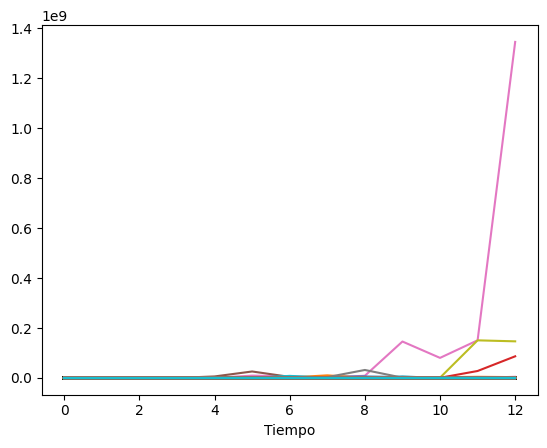

In [53]:
T = 1 # Un Año
mu = Datos['debtinc'].mean()
sigma = np.sqrt(Datos['debtinc'].var())
S0 = 140 # ultimo precio observado
NS = 10000
M = 12 # Partición del año en meses
St = PathsGBM(S0,mu,sigma,T,NS,M)
plt.plot(np.transpose(St)) 
plt.xlabel("Tiempo");

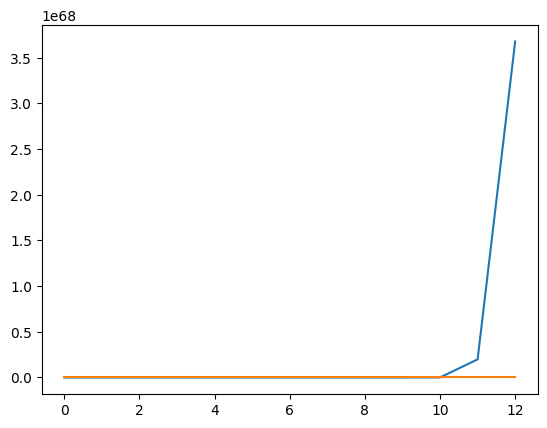

In [49]:
m = 2 # No. trayectorias (columnas)
T = 12 # Meses
mu = Datos['debtinc'].mean()
sigma = np.sqrt(Datos['debtinc'].var())
S0 = 140 # ultimo precio observado
e = norm.rvs(mu,sigma,size=[T,m])
logp = np.zeros([T+1,m])
logp[0] = np.log(S0)
for t in range(T):
    logp[t+1] = logp[t] + e[t]
plt.plot(np.exp(logp));

In [43]:
sigma

6.827233584260971

In [44]:
mu

10.260571428571428

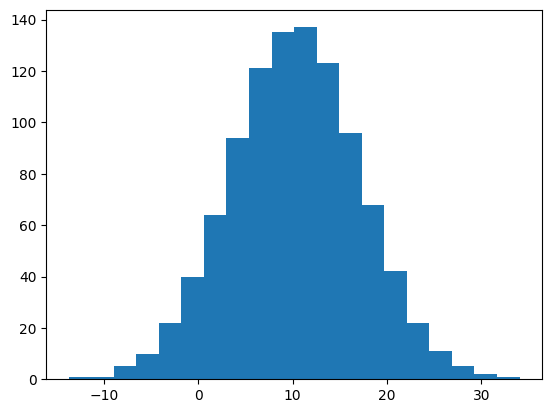

In [55]:
rands_u = lhs(1, 1000)
mu 
sigma 
rands_n = norm(mu, sigma).ppf(rands_u)
plt.hist(rands_n, bins = 20);

Al evidenciar una desviación estándar tan alta, las proyecciones a un año tienden a ser muy planas. Por otra parte, los datos se encuentran sesgados hacia la derecha debido a que su mediana es menor a la media